# K_Neghboors

## Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 

## Function

In [51]:
def k_neigbs(elements, k = 5):
    #mas = elements.reshape(1, elements.shape[0]*elements.shape[1])
    #print(mas)
    mas = np.random.choice(elements.shape[0], size = k, replace = True)
    centres = np.zeros((k, elements.shape[1]))
    for i in range(k):
        centres[i] = np.array(elements[mas[i]])
    clasts = np.zeros(elements.shape[0])
    old_centres = np.array(centres)
    flag = 1;
    while flag == 1:
        for i in range(elements.shape[0]):
            dif = np.linalg.norm(elements[i]-centres[0], ord = 2);
            min_ind = 0
            for j in range(k):
                tmpdif = np.linalg.norm(elements[i]-centres[j], ord = 2);
                if (tmpdif < dif):
                    min_ind = j
                    dif = tmpdif
            clasts[i] = min_ind
        for i in range(k):
            counts = 0
            summ = np.zeros(elements.shape[1])
            for j in range(elements.shape[0]):
                if clasts[j] == i:
                    counts = counts + 1
                    summ += elements[j]
            if (counts != 0):
                centres[i] = summ/counts
        if np.all(old_centres - centres):
            flag = 0
        else:
            old_centres = np.array(centres)
    return clasts
        
    

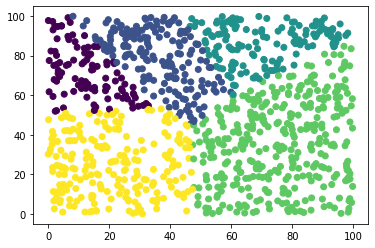

In [57]:
np.random.seed(1)
elements = np.zeros((1000, 2))
for i in range(1000):
    elements[i] = np.random.random(size = 2)*100

plt.scatter(elements[:, 0], elements[:, 1], c=k_neigbs(elements, k = 5))